# Fashion Item Classification (Convolutional Neural Networks)

## Step 1. Problem Statement



The 10 classes are as follows:  

- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 
![image](image.png)

## Step 2. Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Importing the dataset

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')
training = fashion_train_df.values
testing = fashion_test_df.values

In [3]:
fashion_train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [4]:
fashion_test_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


## Step 3. Visualizing Dataset

In [5]:
# dimensions of training dataset
training.shape

(10999, 785)

In [6]:
# dimensions of testing dataset
testing.shape

(10000, 785)

### Displaying 'i'th Row from the Training Dataset by Reshaping it

The 10 classes are as follows:  

- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot

Label:  3


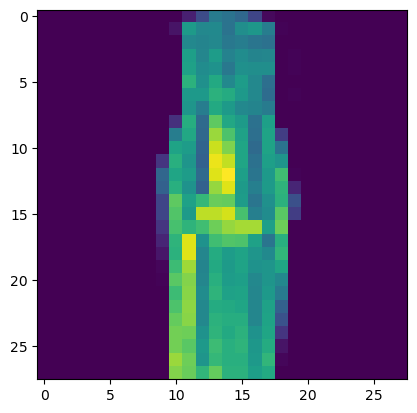

In [34]:
i = random.randint(1,10000)
plt.imshow(training[i,1:].reshape(28,28))
print('Label: ',training[i,0])

Label:  3


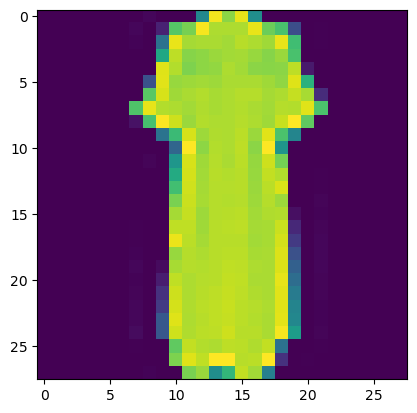

In [35]:
i = random.randint(1,10000)
plt.imshow(training[i,1:].reshape(28,28))
print('Label: ',training[i,0])

Label:  4


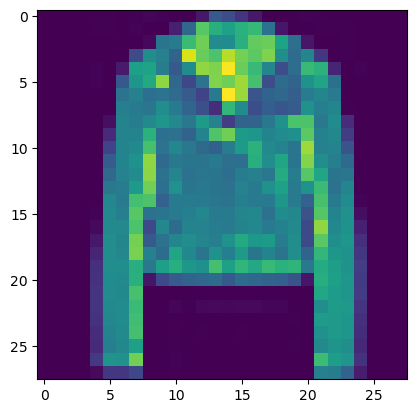

In [28]:
i = random.randint(1,10000)
plt.imshow(training[i,1:].reshape(28,28))
print('Label: ',training[i,0])

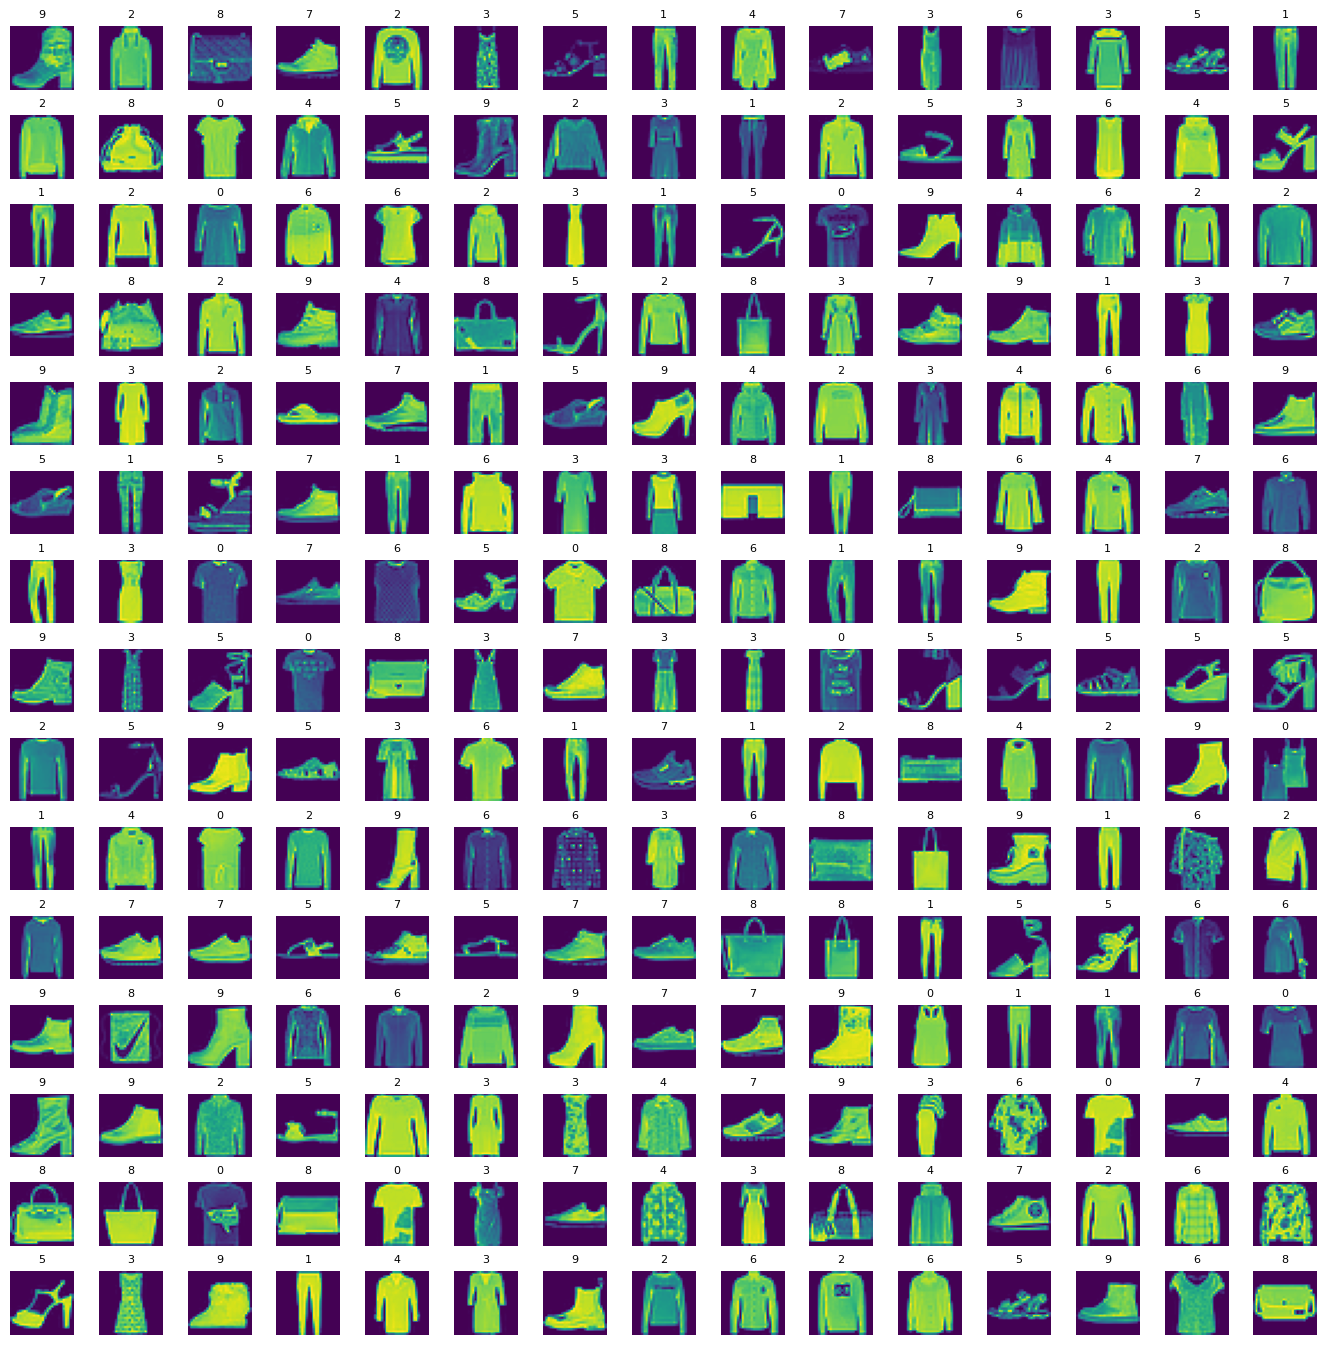

In [37]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)        

## Step 4. Training the Model

In [11]:
# training dataset
X_train = training[:,1:]/255
y_train = training[:,0]

In [12]:
# testing dataset
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size = 0.2, random_state=0)

In [14]:
# reshaping the training and testing data into a matrix that can be feeded
# convolutional neural network
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [38]:
X_train.shape

NameError: name 'X_train' is not defined

In [ ]:
X_test.shape

In [17]:
X_validate.shape

(12000, 28, 28, 1)

### Initialising the CNN

In [18]:
import tensorflow as tf

In [19]:
cnn = tf.keras.models.Sequential()

### Part 1 - Convolution

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               input_shape=[28,28,1],
                               activation = 'relu'
                              )
       )

### Part 2 - Pooling

In [21]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2
                                 )
       )

### Adding a second convolutional layer

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation = 'relu'
                              )
       )
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2
                                 )
       )

### Part 3 - Flattening

In [23]:
cnn.add(tf.keras.layers.Flatten())

###  Part 4 - Full Connection

In [24]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Part 5 - Output Layer

In [25]:
cnn.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))

### Compliling the CNN

In [26]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

### Training the CNN on the Training set and evaluating it on the Test set

In [27]:
cnn.fit(x=X_train,
        y=y_train,
        validation_data=(X_validate,y_validate),
        epochs=50,
        batch_size=512,
        verbose=1
       )

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 26s 532us/sample - loss: 0.9485 - accuracy: 0.6614 - val_loss: 0.5927 - val_accuracy: 0.7787
Epoch 2/50
48000/48000 [==============================] - 30s 622us/sample - loss: 0.5401 - accuracy: 0.8007 - val_loss: 0.4968 - val_accuracy: 0.8214
Epoch 3/50
48000/48000 [==============================] - 26s 538us/sample - loss: 0.4713 - accuracy: 0.8294 - val_loss: 0.4372 - val_accuracy: 0.8481
Epoch 4/50
48000/48000 [==============================] - 23s 477us/sample - loss: 0.4280 - accuracy: 0.8468 - val_loss: 0.4118 - val_accuracy: 0.8540
Epoch 5/50
48000/48000 [==============================] - 22s 464us/sample - loss: 0.4024 - accuracy: 0.8574 - val_loss: 0.4032 - val_accuracy: 0.8566
Epoch 6/50
48000/48000 [==============================] - 22s 460us/sample - loss: 0.3845 - accuracy: 0.8633 - val_loss: 0.3726 - val_accuracy: 0.8670
Epoch 7/50
48000/48000 [====================

## Step 5. Evaluating the Model

In [28]:
evaluation = cnn.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 156us/sample - loss: 0.2609 - accuracy: 0.9096
Test Accuracy : 0.910


In [29]:
predict_classes = cnn.predict_classes(X_test)

In [30]:
predict_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

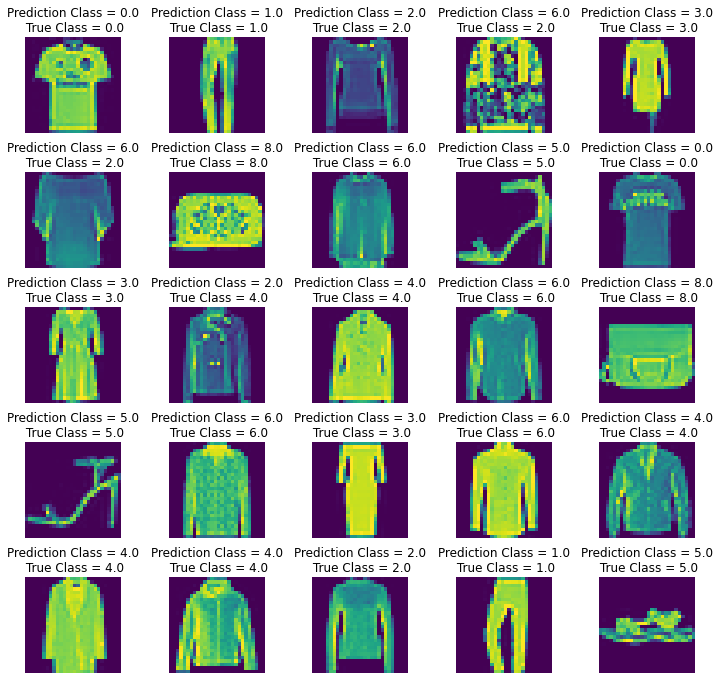

In [31]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predict_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

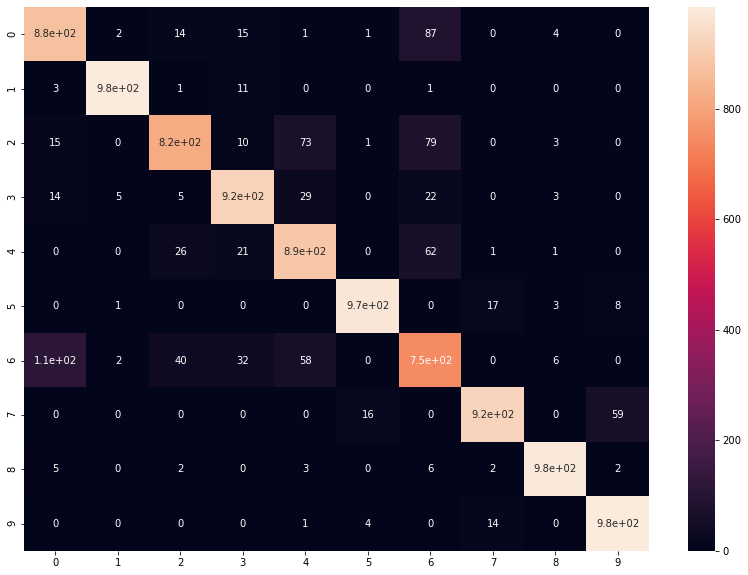

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

In [33]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
cr = classification_report(y_test,predict_classes,target_names=target_names)
print(cr)

              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.86      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.90      0.82      0.86      1000
     Class 3       0.91      0.92      0.92      1000
     Class 4       0.84      0.89      0.87      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.74      0.75      0.75      1000
     Class 7       0.96      0.93      0.94      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.93      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Step 6. improving the Model

__Improving the model by increasing the filter maps and adding dropout() layer.__

In [34]:
cnn = tf.keras.models.Sequential()

### Part 1 - Convolution

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=64,
                               kernel_size=3,
                               input_shape=[28,28,1],
                               activation = 'relu'
                              )
       )

### Part 2 - Pooling

In [36]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2
                                 )
       )

### Part 3 - Dropout

In [37]:
cnn.add(tf.keras.layers.Dropout(0.25))

### Adding a second convolutional layer

In [38]:
cnn.add(tf.keras.layers.Conv2D(filters=64,
                               kernel_size=3,
                               activation = 'relu'
                              )
       )
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2
                                 )
       )
cnn.add(tf.keras.layers.Dropout(0.25))

### Part 4 - Flattening

In [39]:
cnn.add(tf.keras.layers.Flatten())

###  Part 5 - Full Connection

In [40]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))

### Part 6 - Output Layer

In [41]:
cnn.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))

### Compliling the CNN

In [42]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

### Training the CNN on the Training set and evaluating it on the Test set

In [43]:
cnn.fit(x=X_train,
        y=y_train,
        validation_data=(X_validate,y_validate),
        epochs=50,
        batch_size=512,
        verbose=1
       )

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 54s 1ms/sample - loss: 1.0400 - accuracy: 0.6247 - val_loss: 0.5960 - val_accuracy: 0.7763
Epoch 2/50
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.6056 - accuracy: 0.7769 - val_loss: 0.4849 - val_accuracy: 0.8188
Epoch 3/50
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.5125 - accuracy: 0.8131 - val_loss: 0.4105 - val_accuracy: 0.8507
Epoch 4/50
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.4529 - accuracy: 0.8375 - val_loss: 0.3742 - val_accuracy: 0.8687
Epoch 5/50
48000/48000 [==============================] - 56s 1ms/sample - loss: 0.4171 - accuracy: 0.8490 - val_loss: 0.3537 - val_accuracy: 0.8732
Epoch 6/50
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.3906 - accuracy: 0.8591 - val_loss: 0.3375 - val_accuracy: 0.8788
Epoch 7/50
48000/48000 [==============================] 

### Evaluating the Model

In [44]:
evaluation = cnn.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 258us/sample - loss: 0.2020 - accuracy: 0.9278
Test Accuracy : 0.928


In [45]:
predict_classes = cnn.predict_classes(X_test)

In [46]:
predict_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

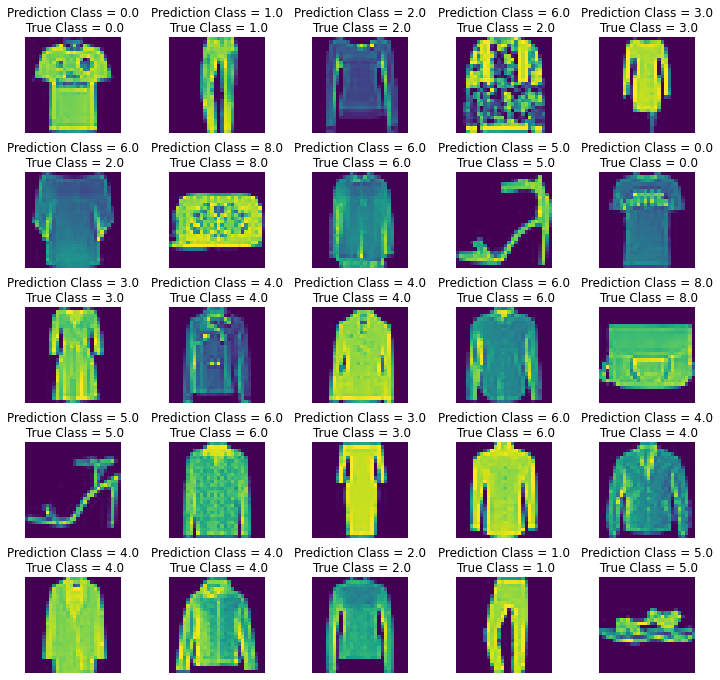

In [47]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predict_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

NameError: name 'y_test' is not defined

In [49]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
cr = classification_report(y_test,predict_classes,target_names=target_names)
print(cr)

              precision    recall  f1-score   support

     Class 0       0.87      0.89      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.91      0.89      1000
     Class 3       0.93      0.94      0.94      1000
     Class 4       0.90      0.88      0.89      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.77      0.79      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

